<a href="https://colab.research.google.com/github/NAGPALADITI14/Data_Mining/blob/main/Pandas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

data={
    'Col1': np.random.randint(1,100,10),
    'Col2': np.random.uniform(0,1,10),
    'Col3': np.random.normal(0,1,10)
}
df=pd.DataFrame(data)
print("The Original Dataframe is:\n",df)

The Original Dataframe is:
    Col1      Col2      Col3
0    78  0.379160  0.801086
1    31  0.604033  2.133495
2    15  0.256125  0.794145
3    46  0.705086  0.772927
4    33  0.284304 -0.080709
5    49  0.196882 -1.854955
6    29  0.662933 -0.726364
7    36  0.445990 -1.095612
8    19  0.705866 -1.176423
9    92  0.936668  0.622943


# **Window Functions**

In [ ]:
# Creating a DataFrame with sample data
data = {
    "Employee": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hank"],
    "Department": ["HR", "IT", "HR", "IT", "Finance", "Finance", "HR", "IT"],
    "Salary": [50000, 60000, 55000, 70000, 75000, 80000, 52000, 72000],
    "Experience": [2, 5, 3, 7, 10, 12, 1, 6]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df, "\n")

# Rolling window - calculating moving average of Salary
df["Salary_Moving_Avg"] = df["Salary"].rolling(window=3).mean()
print("DataFrame with Moving Average of Salary:")
print(df, "\n")

# Expanding window - cumulative sum of Experience
df["Cumulative_Experience"] = df["Experience"].expanding().sum()
print("DataFrame with Cumulative Sum of Experience:")
print(df, "\n")

# Applying an Aggregation using Rolling Window
df["Salary_Rolling_Max"] = df["Salary"].rolling(window=3).max()
print("DataFrame with Rolling Max Salary:")
print(df, "\n")

# Grouped rolling window - moving average per Department
df["Dept_Salary_Moving_Avg"] = df.groupby("Department")["Salary"].rolling(window=2).mean().reset_index(level=0, drop=True)
print("DataFrame with Department-wise Moving Average of Salary:")
print(df, "\n")

# Exponential Weighted Moving Average (EWMA)
df["Salary_EWMA"] = df["Salary"].ewm(span=3, adjust=False).mean()
print("DataFrame with Exponential Weighted Moving Average of Salary:")
print(df, "\n")

print("All pandas window functions executed successfully!")


Original DataFrame:
  Employee Department  Salary  Experience
0    Alice         HR   50000           2
1      Bob         IT   60000           5
2  Charlie         HR   55000           3
3    David         IT   70000           7
4      Eve    Finance   75000          10
5    Frank    Finance   80000          12
6    Grace         HR   52000           1
7     Hank         IT   72000           6 

DataFrame with Moving Average of Salary:
  Employee Department  Salary  Experience  Salary_Moving_Avg
0    Alice         HR   50000           2                NaN
1      Bob         IT   60000           5                NaN
2  Charlie         HR   55000           3       55000.000000
3    David         IT   70000           7       61666.666667
4      Eve    Finance   75000          10       66666.666667
5    Frank    Finance   80000          12       75000.000000
6    Grace         HR   52000           1       69000.000000
7     Hank         IT   72000           6       68000.000000 

DataFram

# **Aggregations**

In [ ]:
print("Original DataFrame:\n",df)

#Applying Aggregations on DataFrame Rows
print("Aggregated Data:\n",df.agg(['sum','min','max']))

#Applying different functions per columns
print("Aggregated Data:\n",df.agg({'Col1':['sum','min','max'],'Col2':['min','sum']}))

Original DataFrame:
    Col1      Col2      Col3
0    78  0.379160  0.801086
1    31  0.604033  2.133495
2    15  0.256125  0.794145
3    46  0.705086  0.772927
4    33  0.284304 -0.080709
5    49  0.196882 -1.854955
6    29  0.662933 -0.726364
7    36  0.445990 -1.095612
8    19  0.705866 -1.176423
9    92  0.936668  0.622943
Aggregated Data:
      Col1      Col2      Col3
sum   428  5.177048  0.190533
min    15  0.196882 -1.854955
max    92  0.936668  2.133495
Aggregated Data:
      Col1      Col2
sum   428  5.177048
min    15  0.196882
max    92       NaN


# **Missing data**

In [ ]:
# Creating a DataFrame with missing values
data = {
    "ID": [1, 2, 3, 4, 5],
    "Name": ["Alice", "Bob", np.nan, "David", "Eve"],
    "Age": [25, np.nan, 30, 35, np.nan],
    "Salary": [50000, 60000, 70000, np.nan, 90000]
}
df = pd.DataFrame(data)
print("Original DataFrame with Missing Values:")
print(df, "\n")

# Detecting Missing Values
df_missing = df.isnull()
print("Missing Value Detection:")
print(df_missing, "\n")

# Filling Missing Values with a Specific Value
df_filled = df.fillna(value={"Name": "Unknown", "Age": df["Age"].mean(), "Salary": 0})
print("DataFrame after Filling Missing Values:")
print(df_filled, "\n")

# Dropping Rows with Missing Values
df_dropped_rows = df.dropna()
print("DataFrame after Dropping Rows with Missing Values:")
print(df_dropped_rows, "\n")

# Dropping Columns with Missing Values
df_dropped_cols = df.dropna(axis=1)
print("DataFrame after Dropping Columns with Missing Values:")
print(df_dropped_cols, "\n")

# Forward Fill (Propagate previous value forward)
df_ffill = df.fillna(method='ffill')
print("DataFrame after Forward Fill:")
print(df_ffill, "\n")

# Backward Fill (Propagate next value backward)
df_bfill = df.fillna(method='bfill')
print("DataFrame after Backward Fill:")
print(df_bfill, "\n")

# Interpolating Missing Values
df_interpolated = df.interpolate()
print("DataFrame after Interpolation:")
print(df_interpolated, "\n")

print("All pandas missing data operations executed successfully!")


Original DataFrame with Missing Values:
   ID   Name   Age   Salary
0   1  Alice  25.0  50000.0
1   2    Bob   NaN  60000.0
2   3    NaN  30.0  70000.0
3   4  David  35.0      NaN
4   5    Eve   NaN  90000.0 

Missing Value Detection:
      ID   Name    Age  Salary
0  False  False  False   False
1  False  False   True   False
2  False   True  False   False
3  False  False  False    True
4  False  False   True   False 

DataFrame after Filling Missing Values:
   ID     Name   Age   Salary
0   1    Alice  25.0  50000.0
1   2      Bob  30.0  60000.0
2   3  Unknown  30.0  70000.0
3   4    David  35.0      0.0
4   5      Eve  30.0  90000.0 

DataFrame after Dropping Rows with Missing Values:
   ID   Name   Age   Salary
0   1  Alice  25.0  50000.0 

DataFrame after Dropping Columns with Missing Values:
   ID
0   1
1   2
2   3
3   4
4   5 

DataFrame after Forward Fill:
   ID   Name   Age   Salary
0   1  Alice  25.0  50000.0
1   2    Bob  25.0  60000.0
2   3    Bob  30.0  70000.0
3   4  David

<ipython-input-12-fdd8f40c4b93>:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ffill = df.fillna(method='ffill')
<ipython-input-12-fdd8f40c4b93>:41: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_bfill = df.fillna(method='bfill')
<ipython-input-12-fdd8f40c4b93>:46: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_interpolated = df.interpolate()


# **GroupBY**

In [ ]:
import pandas as pd
import numpy as np

# Creating a DataFrame with sample data
data = {
    "Department": ["HR", "IT", "HR", "IT", "Finance", "Finance", "HR", "IT"],
    "Employee": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Hank"],
    "Salary": [50000, 60000, 55000, 70000, 75000, 80000, 52000, 72000],
    "Experience": [2, 5, 3, 7, 10, 12, 1, 6]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df, "\n")

# Grouping by Department and calculating mean salary
df_grouped_salary = df.groupby("Department")["Salary"].mean()
print("Average Salary by Department:")
print(df_grouped_salary, "\n")

# Grouping by Department and calculating sum of experience
df_grouped_experience = df.groupby("Department")["Experience"].sum()
print("Total Experience by Department:")
print(df_grouped_experience, "\n")

# Grouping by Department and getting multiple aggregations
df_grouped_multi = df.groupby("Department").agg({"Salary": ["mean", "max", "min"], "Experience": ["sum", "mean"]})
print("Aggregated Data by Department:")
print(df_grouped_multi, "\n")

# Grouping by multiple columns
df_grouped_multi_col = df.groupby(["Department", "Experience"]).sum()
print("Grouped by Department and Experience:")
print(df_grouped_multi_col, "\n")

# Using groupby with transform to add a column
df["Avg_Salary_by_Dept"] = df.groupby("Department")["Salary"].transform("mean")
print("DataFrame with Average Salary per Department added:")
print(df, "\n")

print("All pandas groupby operations executed successfully!")

Original DataFrame:
  Department Employee  Salary  Experience
0         HR    Alice   50000           2
1         IT      Bob   60000           5
2         HR  Charlie   55000           3
3         IT    David   70000           7
4    Finance      Eve   75000          10
5    Finance    Frank   80000          12
6         HR    Grace   52000           1
7         IT     Hank   72000           6 

Average Salary by Department:
Department
Finance    77500.000000
HR         52333.333333
IT         67333.333333
Name: Salary, dtype: float64 

Total Experience by Department:
Department
Finance    22
HR          6
IT         18
Name: Experience, dtype: int64 

Aggregated Data by Department:
                  Salary               Experience      
                    mean    max    min        sum  mean
Department                                             
Finance     77500.000000  80000  75000         22  11.0
HR          52333.333333  55000  50000          6   2.0
IT          67333.333333  7

# **Merging/Joining**

In [ ]:
left = pd.DataFrame({
'id': [1, 2, 3, 4, 5],
'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
'subject_id': ['sub1', 'sub2', 'sub4', 'sub6', 'sub5']
})

# Creating the second DataFrame
right = pd.DataFrame({
'id': [1, 2, 3, 4, 5],
'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
'subject_id': ['sub2', 'sub4', 'sub3', 'sub6', 'sub5']
})

print("Left DataFrame:")
print(left)
print("\nRight DataFrame:")
print(right)


# Merging DataFrames on a key 'id'
result = left.merge(right, on='id')
print(result)


# Merging on multiple keys 'id' and 'subject_id'
result = left.merge(right, on=['id', 'subject_id'])
print(result)

Left DataFrame:
   id    Name subject_id
0   1    Alex       sub1
1   2     Amy       sub2
2   3   Allen       sub4
3   4   Alice       sub6
4   5  Ayoung       sub5

Right DataFrame:
   id   Name subject_id
0   1  Billy       sub2
1   2  Brian       sub4
2   3   Bran       sub3
3   4  Bryce       sub6
4   5  Betty       sub5
   id  Name_x subject_id_x Name_y subject_id_y
0   1    Alex         sub1  Billy         sub2
1   2     Amy         sub2  Brian         sub4
2   3   Allen         sub4   Bran         sub3
3   4   Alice         sub6  Bryce         sub6
4   5  Ayoung         sub5  Betty         sub5
   id  Name_x subject_id Name_y
0   4   Alice       sub6  Bryce
1   5  Ayoung       sub5  Betty


# **Concatenation**

In [ ]:
# Creating Sample DataFrames
data1 = {
    "ID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35]
}
data2 = {
    "ID": [4, 5, 6],
    "Name": ["David", "Eve", "Frank"],
    "Age": [40, 45, 50]
}
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)
print("DataFrame 1:")
print(df1, "\n")
print("DataFrame 2:")
print(df2, "\n")

# Concatenation along rows (axis=0)
df_concat_rows = pd.concat([df1, df2], axis=0, ignore_index=True)
print("Concatenated DataFrame (Rows):")
print(df_concat_rows, "\n")

# Creating DataFrames with different columns
data3 = {
    "ID": [1, 2, 3],
    "Salary": [50000, 60000, 70000]
}
df3 = pd.DataFrame(data3)
print("DataFrame 3 (Different Columns):")
print(df3, "\n")

# Concatenation along columns (axis=1)
df_concat_cols = pd.concat([df1, df3], axis=1)
print("Concatenated DataFrame (Columns):")
print(df_concat_cols, "\n")

# Concatenation with different column sets
data4 = {
    "ID": [4, 5, 6],
    "Salary": [75000, 80000, 85000]
}
df4 = pd.DataFrame(data4)
print("DataFrame 4 (Additional Data with Different Columns):")
print(df4, "\n")

df_concat_mixed = pd.concat([df1, df4], axis=0, ignore_index=True)
print("Concatenated DataFrame with Different Columns:")
print(df_concat_mixed, "\n")

print("All pandas concatenation operations executed successfully!")


DataFrame 1:
   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35 

DataFrame 2:
   ID   Name  Age
0   4  David   40
1   5    Eve   45
2   6  Frank   50 

Concatenated DataFrame (Rows):
   ID     Name  Age
0   1    Alice   25
1   2      Bob   30
2   3  Charlie   35
3   4    David   40
4   5      Eve   45
5   6    Frank   50 

DataFrame 3 (Different Columns):
   ID  Salary
0   1   50000
1   2   60000
2   3   70000 

Concatenated DataFrame (Columns):
   ID     Name  Age  ID  Salary
0   1    Alice   25   1   50000
1   2      Bob   30   2   60000
2   3  Charlie   35   3   70000 

DataFrame 4 (Additional Data with Different Columns):
   ID  Salary
0   4   75000
1   5   80000
2   6   85000 

Concatenated DataFrame with Different Columns:
   ID     Name   Age   Salary
0   1    Alice  25.0      NaN
1   2      Bob  30.0      NaN
2   3  Charlie  35.0      NaN
3   4      NaN   NaN  75000.0
4   5      NaN   NaN  80000.0
5   6      NaN   NaN  85000.0 

All pandas concaten

# **date functionality**

In [ ]:
import pandas as pd
import numpy as np

# Creating a DataFrame with date-related data
data = {
    "ID": [1, 2, 3],
    "Date": pd.to_datetime(["2025-03-01", "2025-03-10", "2025-03-20"])
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df, "\n")

# Extracting Year, Month, and Day
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
print("DataFrame with Extracted Year, Month, and Day:")
print(df, "\n")

# Extracting Day of the Week
df["Day_of_Week"] = df["Date"].dt.day_name()
print("DataFrame with Day of the Week:")
print(df, "\n")

# Adding a Date Offset (Adding 7 days)
df["Date_After_7_Days"] = df["Date"] + pd.DateOffset(days=7)
print("DataFrame after Adding 7 Days:")
print(df, "\n")

# Subtracting a Date Offset (Subtracting 3 months)
df["Date_Before_3_Months"] = df["Date"] - pd.DateOffset(months=3)
print("DataFrame after Subtracting 3 Months:")
print(df, "\n")

# Checking if a Date is in a Leap Year
df["Is_Leap_Year"] = df["Date"].dt.is_leap_year
print("DataFrame with Leap Year Check:")
print(df, "\n")

# Creating a Date Range
date_range = pd.date_range(start="2025-03-01", periods=5, freq="D")
print("Generated Date Range:")
print(date_range, "\n")

print("All pandas date functionalities executed successfully!")


Original DataFrame:
   ID       Date
0   1 2025-03-01
1   2 2025-03-10
2   3 2025-03-20 

DataFrame with Extracted Year, Month, and Day:
   ID       Date  Year  Month  Day
0   1 2025-03-01  2025      3    1
1   2 2025-03-10  2025      3   10
2   3 2025-03-20  2025      3   20 

DataFrame with Day of the Week:
   ID       Date  Year  Month  Day Day_of_Week
0   1 2025-03-01  2025      3    1    Saturday
1   2 2025-03-10  2025      3   10      Monday
2   3 2025-03-20  2025      3   20    Thursday 

DataFrame after Adding 7 Days:
   ID       Date  Year  Month  Day Day_of_Week Date_After_7_Days
0   1 2025-03-01  2025      3    1    Saturday        2025-03-08
1   2 2025-03-10  2025      3   10      Monday        2025-03-17
2   3 2025-03-20  2025      3   20    Thursday        2025-03-27 

DataFrame after Subtracting 3 Months:
   ID       Date  Year  Month  Day Day_of_Week Date_After_7_Days  \
0   1 2025-03-01  2025      3    1    Saturday        2025-03-08   
1   2 2025-03-10  2025      3   

# **Timedelta**

In [ ]:
import pandas as pd
import numpy as np

# Creating a DataFrame with datetime values
data = {
    "ID": [1, 2, 3],
    "Start_Date": pd.to_datetime(["2025-03-01", "2025-03-05", "2025-03-10"]),
    "End_Date": pd.to_datetime(["2025-03-10", "2025-03-15", "2025-03-20"])
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df, "\n")

# Calculating Time Difference (Timedelta)
df["Duration"] = df["End_Date"] - df["Start_Date"]
print("DataFrame with Duration (Timedelta):")
print(df, "\n")

# Adding a timedelta of 5 days to Start_Date
df["New_Start_Date"] = df["Start_Date"] + pd.Timedelta(days=5)
print("DataFrame after adding 5 days to Start_Date:")
print(df, "\n")

# Subtracting a timedelta of 2 days from End_Date
df["New_End_Date"] = df["End_Date"] - pd.Timedelta(days=2)
print("DataFrame after subtracting 2 days from End_Date:")
print(df, "\n")

# Creating a timedelta column
df["Custom_Timedelta"] = pd.to_timedelta(["2 days", "4 days", "6 days"])
print("DataFrame with Custom Timedelta Column:")
print(df, "\n")

print("All pandas timedelta operations executed successfully!")


Original DataFrame:
   ID Start_Date   End_Date
0   1 2025-03-01 2025-03-10
1   2 2025-03-05 2025-03-15
2   3 2025-03-10 2025-03-20 

DataFrame with Duration (Timedelta):
   ID Start_Date   End_Date Duration
0   1 2025-03-01 2025-03-10   9 days
1   2 2025-03-05 2025-03-15  10 days
2   3 2025-03-10 2025-03-20  10 days 

DataFrame after adding 5 days to Start_Date:
   ID Start_Date   End_Date Duration New_Start_Date
0   1 2025-03-01 2025-03-10   9 days     2025-03-06
1   2 2025-03-05 2025-03-15  10 days     2025-03-10
2   3 2025-03-10 2025-03-20  10 days     2025-03-15 

DataFrame after subtracting 2 days from End_Date:
   ID Start_Date   End_Date Duration New_Start_Date New_End_Date
0   1 2025-03-01 2025-03-10   9 days     2025-03-06   2025-03-08
1   2 2025-03-05 2025-03-15  10 days     2025-03-10   2025-03-13
2   3 2025-03-10 2025-03-20  10 days     2025-03-15   2025-03-18 

DataFrame with Custom Timedelta Column:
   ID Start_Date   End_Date Duration New_Start_Date New_End_Date  \
0   

# **Categorical Data**

In [ ]:
import pandas as pd

# Create Series object with categorical data
s = pd.Series(["a", "b", "c", "a"], dtype="category")

# Display the categorical Series
print('Series with Categorical Data:\n', s)


df = pd.DataFrame({"Col_a": list("aeeioou"), "Col_b": range(7)})

# Display the Input DataFrame
print('Input DataFrame:\n',df)
print('\nVerify the Data type of each column:\n', df.dtypes)

# Convert the Data type of col_a to categorical
df['Col_a'] = df["Col_a"].astype("category")

# Display the Input DataFrame
print('\nConverted DataFrame:\n',df)
print('\nVerify the Data type of each column:\n', df.dtypes)

Series with Categorical Data:
 0    a
1    b
2    c
3    a
dtype: category
Categories (3, object): ['a', 'b', 'c']
Input DataFrame:
   Col_a  Col_b
0     a      0
1     e      1
2     e      2
3     i      3
4     o      4
5     o      5
6     u      6

Verify the Data type of each column:
 Col_a    object
Col_b     int64
dtype: object

Converted DataFrame:
   Col_a  Col_b
0     a      0
1     e      1
2     e      2
3     i      3
4     o      4
5     o      5
6     u      6

Verify the Data type of each column:
 Col_a    category
Col_b       int64
dtype: object


# **Visualisation**

Original DataFrame:
  Category  Value1  Value2
0        A      10       5
1        B      20      15
2        C      30      25
3        D      40      35
4        E      50      45 



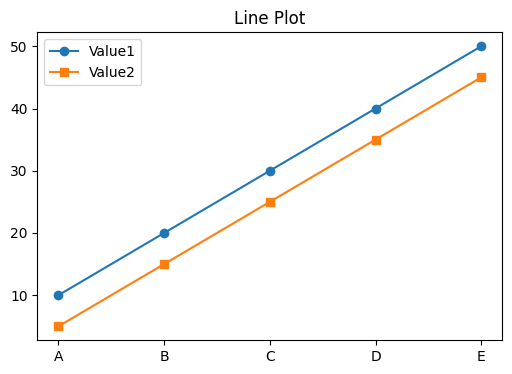

Displayed Line Plot



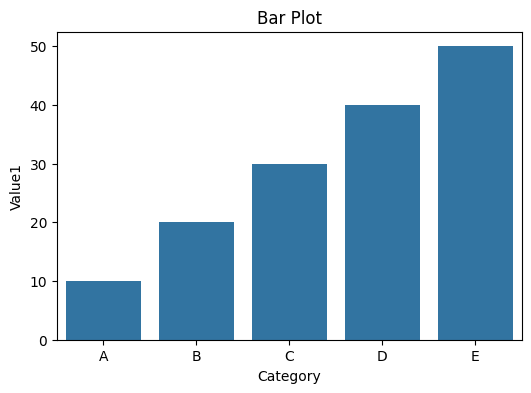

Displayed Bar Plot



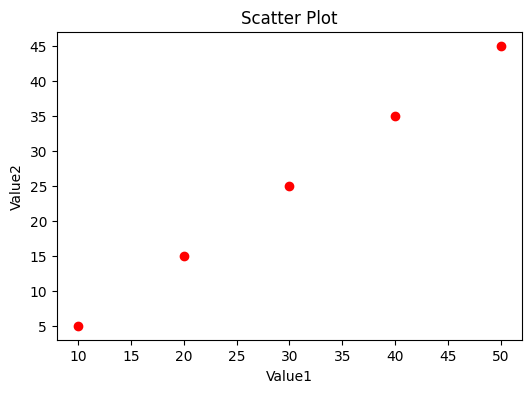

Displayed Scatter Plot



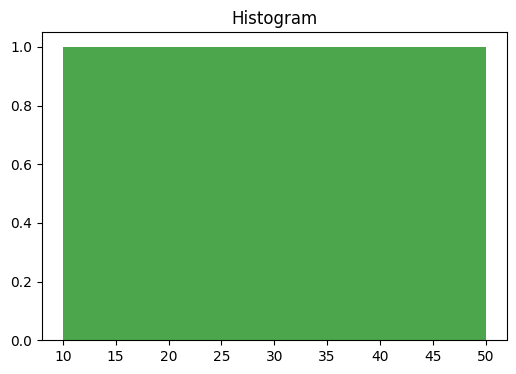

Displayed Histogram



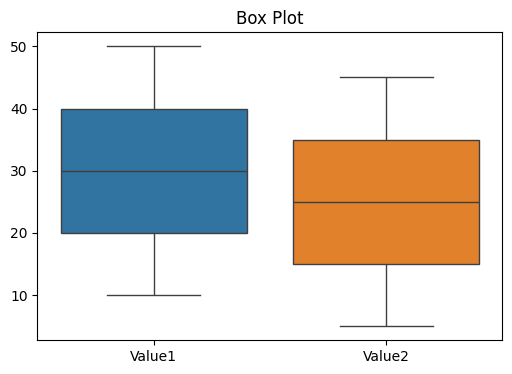

Displayed Box Plot



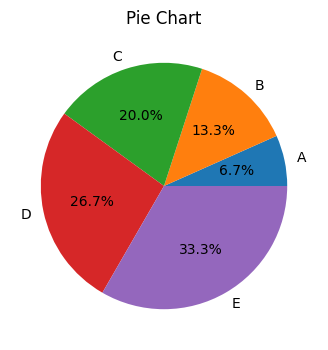

Displayed Pie Chart



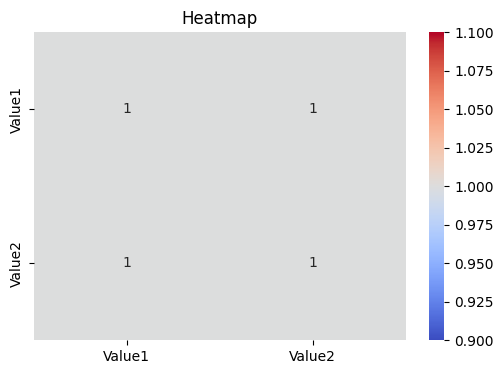

Displayed Heatmap

All pandas visualization operations executed successfully!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample DataFrame
data = {
    "Category": ["A", "B", "C", "D", "E"],
    "Value1": [10, 20, 30, 40, 50],
    "Value2": [5, 15, 25, 35, 45]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df, "\n")

# Line Plot
plt.figure(figsize=(6, 4))
plt.plot(df["Category"], df["Value1"], marker='o', label='Value1')
plt.plot(df["Category"], df["Value2"], marker='s', label='Value2')
plt.title("Line Plot")
plt.legend()
plt.show()
print("Displayed Line Plot\n")

# Bar Plot
plt.figure(figsize=(6, 4))
sns.barplot(x="Category", y="Value1", data=df)
plt.title("Bar Plot")
plt.show()
print("Displayed Bar Plot\n")

# Scatter Plot
plt.figure(figsize=(6, 4))
plt.scatter(df["Value1"], df["Value2"], color='r')
plt.xlabel("Value1")
plt.ylabel("Value2")
plt.title("Scatter Plot")
plt.show()
print("Displayed Scatter Plot\n")

# Histogram
plt.figure(figsize=(6, 4))
plt.hist(df["Value1"], bins=5, color='g', alpha=0.7)
plt.title("Histogram")
plt.show()
print("Displayed Histogram\n")

# Box Plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[["Value1", "Value2"]])
plt.title("Box Plot")
plt.show()
print("Displayed Box Plot\n")

# Pie Chart
plt.figure(figsize=(6, 4))
plt.pie(df["Value1"], labels=df["Category"], autopct='%1.1f%%')
plt.title("Pie Chart")
plt.show()
print("Displayed Pie Chart\n")

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.drop("Category", axis=1).corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap")
plt.show()
print("Displayed Heatmap\n")

print("All pandas visualization operations executed successfully!")


# **Io tools**

In [ ]:
import pandas as pd
import numpy as np
import sqlite3

# Sample DataFrame
data = {
    "ID": [1, 2, 3],
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "Salary": [50000, 60000, 70000]
}
df = pd.DataFrame(data)
print("Original DataFrame:")
print(df, "\n")

# CSV I/O
df.to_csv("sample.csv", index=False)
print("DataFrame written to sample.csv")
df_csv = pd.read_csv("sample.csv")
print("DataFrame read from sample.csv:")
print(df_csv, "\n")

# Excel I/O
df.to_excel("sample.xlsx", index=False)
print("DataFrame written to sample.xlsx")
df_excel = pd.read_excel("sample.xlsx")
print("DataFrame read from sample.xlsx:")
print(df_excel, "\n")

# JSON I/O
df.to_json("sample.json", orient="records")
print("DataFrame written to sample.json")
df_json = pd.read_json("sample.json")
print("DataFrame read from sample.json:")
print(df_json, "\n")

# HTML I/O
df.to_html("sample.html")
print("DataFrame written to sample.html")
df_html = pd.read_html("sample.html")[0]
print("DataFrame read from sample.html:")
print(df_html, "\n")

# SQL I/O (Using SQLite)
conn = sqlite3.connect("sample.db")
df.to_sql("employees", conn, if_exists="replace", index=False)
print("DataFrame written to SQLite database (table: employees)")
df_sql = pd.read_sql("SELECT * FROM employees", conn)
print("DataFrame read from SQLite database:")
print(df_sql, "\n")
conn.close()

print("All pandas I/O operations executed successfully!")


Original DataFrame:
   ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   70000 

DataFrame written to sample.csv
DataFrame read from sample.csv:
   ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   70000 

DataFrame written to sample.xlsx
DataFrame read from sample.xlsx:
   ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   70000 

DataFrame written to sample.json
DataFrame read from sample.json:
   ID     Name  Age  Salary
0   1    Alice   25   50000
1   2      Bob   30   60000
2   3  Charlie   35   70000 

DataFrame written to sample.html
DataFrame read from sample.html:
   Unnamed: 0  ID     Name  Age  Salary
0           0   1    Alice   25   50000
1           1   2      Bob   30   60000
2           2   3  Charlie   35   70000 

DataFrame written to SQLite database (table: employees)
DataFrame read from SQLite database:
   ID  

# **Sparse data**